In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [10]:
def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

## Distance Hamming 16

### Perfect mix

### 100000 individus

In [11]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation3"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation4"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation5"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation6"

In [12]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0   480  769230       34     97  769842
   Init     Run  Mesures  Close   Total
0  1168  766457       26    131  767784
   Init     Run  Mesures  Close   Total
0   552  761737       43    140  762473
   Init     Run  Mesures  Close   Total
0  1221  254131      102    132  255587


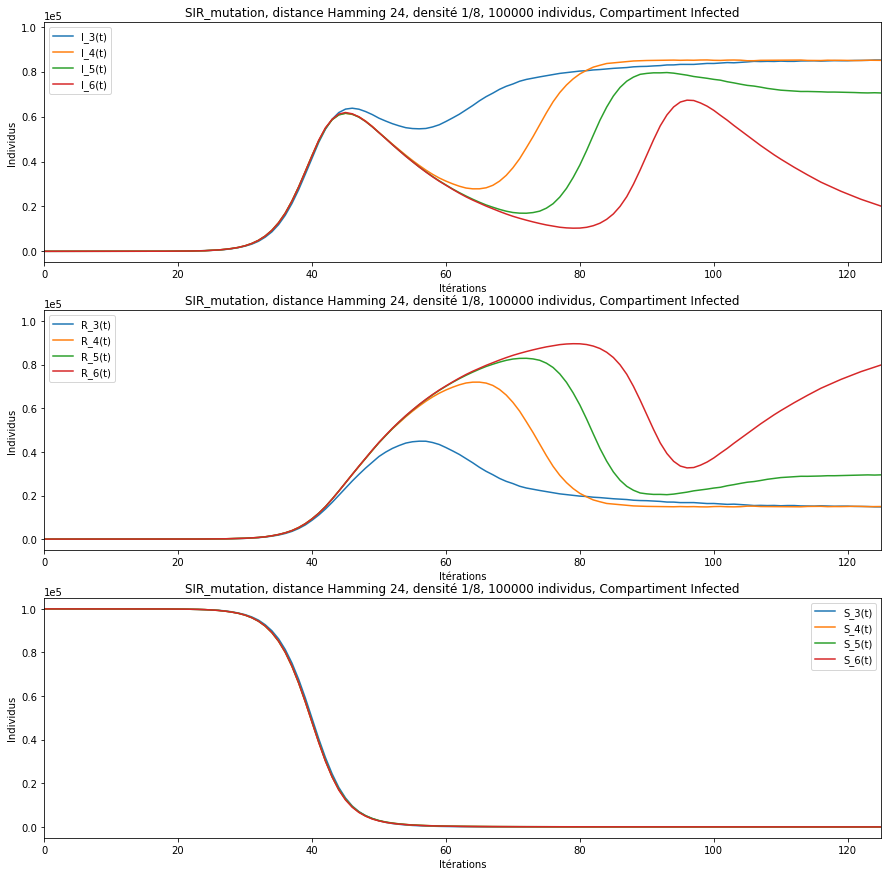

In [13]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_3, = plt.plot(contamine1, label='I_3(t)')
I_4, = plt.plot(contamine2, label='I_4(t)')
I_5, = plt.plot(contamine3, label='I_5(t)')
I_6, = plt.plot(contamine4, label='I_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_3, I_4, I_5, I_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_3, = plt.plot(recovered1, label='R_3(t)')
R_4, = plt.plot(recovered2, label='R_4(t)')
R_5, = plt.plot(recovered3, label='R_5(t)')
R_6, = plt.plot(recovered4, label='R_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_3, R_4, R_5, R_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_3, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_3(t)')
S_4, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_4(t)')
S_5, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_5(t)')
S_6, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_3, S_4, S_5, S_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Distance Hamming 24

### Perfect mix

### 100000 individus

In [14]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation3"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation4"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation5"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation6"

In [15]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0   340  745889        3    130  767477
   Init     Run  Mesures  Close   Total
0   363  729383        3    139  751335
   Init     Run  Mesures  Close   Total
0   283  143136       27     86  164698
   Init     Run  Mesures  Close   Total
0   346  155988       31     94  177920


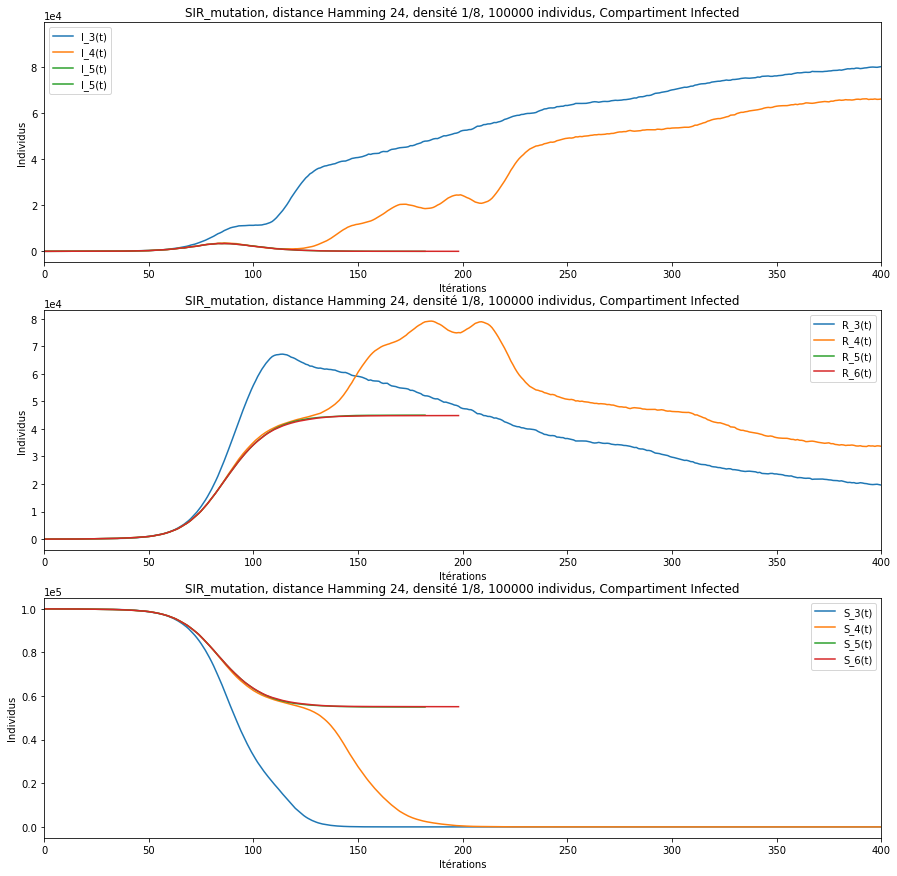

In [16]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 400

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_3, = plt.plot(contamine1, label='I_3(t)')
I_4, = plt.plot(contamine2, label='I_4(t)')
I_5, = plt.plot(contamine3, label='I_5(t)')
I_6, = plt.plot(contamine4, label='I_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_3, I_4, I_5, I_5])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_3, = plt.plot(recovered1, label='R_3(t)')
R_4, = plt.plot(recovered2, label='R_4(t)')
R_5, = plt.plot(recovered3, label='R_5(t)')
R_6, = plt.plot(recovered4, label='R_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_3, R_4, R_5, R_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_3, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_3(t)')
S_4, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_4(t)')
S_5, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_5(t)')
S_6, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_3, S_4, S_5, S_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R 
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())